<a href="https://colab.research.google.com/github/daiangan/udea_cumulos_globulares/blob/main/cumulos_globulares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas

In [62]:
import pandas as pd
import numpy as np

# Importar los datos
data = pd.read_csv("sample_data/ViZieR_cum_glob.tsv", delimiter="|")

# Filtrar los datos sin distancia al sol
data = data.dropna(subset=['Rsun'])

data.head()

,_RAJ2000,_DEJ2000,ID,RAJ2000,DEJ2000,GLON,GLAT,Rsun,Rgc,Vt,[Fe/H],SpT,c,Rh
0,6.021667,-72.080833,NGC 104,00 24 05.2,-72 04 51,305.90,-44.89,4.3,7.3,3.95,-0.76,G4,2.04,2.79
1,13.197917,-26.590000,NGC 288,00 52 47.5,-26 35 24,152.28,-89.38,8.1,11.4,8.09,-1.24,,0.96,2.22
2,15.809583,-70.848333,NGC 362,01 03 14.3,-70 50 54,301.53,-46.25,8.3,9.2,6.40,-1.16,F9,1.94,0.81
3,48.063750,-55.216944,NGC 1261,03 12 15.3,-55 13 01,270.54,-52.13,16.0,17.9,8.29,-1.35,F7,1.27,0.75
4,53.345833,79.580556,Pal 1,03 33 23.0,+79 34 50,130.07,19.03,9.7,15.9,13.52,-0.80,,1.50,0.48


In [63]:
# Chequear los tipos de datos
data.dtypes

_RAJ2000    float64
_DEJ2000    float64
ID           object
RAJ2000      object
DEJ2000      object
GLON        float64
GLAT        float64
Rsun         object
Rgc          object
Vt           object
[Fe/H]       object
SpT          object
c            object
Rh          float64
dtype: object

In [64]:
# Convertir Rsun en un valor numérico para poder calcular
data['Rsun'] = pd.to_numeric(data['Rsun'], errors='coerce')

In [65]:
# Calcular las coordenadas usando radianes
data['x'] = data['Rsun'] * np.cos(np.radians(data['_RAJ2000'])) * np.cos(np.radians(data['_DEJ2000']))
data['y'] = data['Rsun'] * np.sin(np.radians(data['_RAJ2000'])) * np.cos(np.radians(data['_DEJ2000']))
data['z'] = data['Rsun'] * np.sin(np.radians(data['_DEJ2000']))

In [66]:
data.head()

,_RAJ2000,_DEJ2000,ID,RAJ2000,DEJ2000,GLON,GLAT,Rsun,Rgc,Vt,[Fe/H],SpT,c,Rh,x,y,z
0,6.021667,-72.080833,NGC 104,00 24 05.2,-72 04 51,305.90,-44.89,4.3,7.3,3.95,-0.76,G4,2.04,2.79,1.315702,0.138789,-4.091414
1,13.197917,-26.590000,NGC 288,00 52 47.5,-26 35 24,152.28,-89.38,8.1,11.4,8.09,-1.24,,0.96,2.22,7.051967,1.653753,-3.625584
2,15.809583,-70.848333,NGC 362,01 03 14.3,-70 50 54,301.53,-46.25,8.3,9.2,6.40,-1.16,F9,1.94,0.81,2.619976,0.741852,-7.840624
3,48.063750,-55.216944,NGC 1261,03 12 15.3,-55 13 01,270.54,-52.13,16.0,17.9,8.29,-1.35,F7,1.27,0.75,6.099960,6.789869,-13.141087
4,53.345833,79.580556,Pal 1,03 33 23.0,+79 34 50,130.07,19.03,9.7,15.9,13.52,-0.80,,1.50,0.48,1.047272,1.407372,9.540048


In [67]:
# Calcular la posición promedio del centro
x_avg = data['x'].mean()
y_avg = data['y'].mean()
z_avg = data['z'].mean()

In [68]:
x_avg, y_avg, z_avg

(-1.8773897807955038, -5.20959303904406, -3.5349928267690482)

In [69]:
# Distancia al centro
center_distance = np.sqrt(x_avg**2 + y_avg**2 + z_avg**2)
center_distance

6.569674748935471

In [70]:
# Calcular la distancia de cada cúmulo al centro de la Galaxia

import math

def calculate_distance(x1, y1, z1, x2, y2, z2):
    delta_x = x2 - x1
    delta_y = y2 - y1
    delta_z = z2 - z1

    sum_of_squares = delta_x ** 2 + delta_y ** 2 + delta_z ** 2
    distance = math.sqrt(sum_of_squares)

    return distance

data['distance_to_gal_center'] = data.apply(
    lambda row: calculate_distance(
        row['x'],
        row['y'],
        row['z'],
        x_avg,
        y_avg,
        z_avg
    ),
    axis=1
)


In [71]:
data.head()

,_RAJ2000,_DEJ2000,ID,RAJ2000,DEJ2000,GLON,GLAT,Rsun,Rgc,Vt,[Fe/H],SpT,c,Rh,x,y,z,distance_to_gal_center
0,6.021667,-72.080833,NGC 104,00 24 05.2,-72 04 51,305.90,-44.89,4.3,7.3,3.95,-0.76,G4,2.04,2.79,1.315702,0.138789,-4.091414,6.253849
1,13.197917,-26.590000,NGC 288,00 52 47.5,-26 35 24,152.28,-89.38,8.1,11.4,8.09,-1.24,,0.96,2.22,7.051967,1.653753,-3.625584,11.262644
2,15.809583,-70.848333,NGC 362,01 03 14.3,-70 50 54,301.53,-46.25,8.3,9.2,6.40,-1.16,F9,1.94,0.81,2.619976,0.741852,-7.840624,8.613040
3,48.063750,-55.216944,NGC 1261,03 12 15.3,-55 13 01,270.54,-52.13,16.0,17.9,8.29,-1.35,F7,1.27,0.75,6.099960,6.789869,-13.141087,17.317686
4,53.345833,79.580556,Pal 1,03 33 23.0,+79 34 50,130.07,19.03,9.7,15.9,13.52,-0.80,,1.50,0.48,1.047272,1.407372,9.540048,14.943044


In [72]:
# RA y DEC de una estrella en Sagitario.
# Por ejemplo Alnasl (Gamma Sagittarii)
# RA=18h, DEC=-30°
# https://en.wikipedia.org/wiki/Gamma2_Sagittarii
RA_star = 18 * 15  # Convertir a grados
DE_star = -30

RA_star_rad = np.deg2rad(RA_star)
DE_star_rad = np.deg2rad(DE_star)

x_star = center_distance * np.cos(RA_star_rad) * np.cos(DE_star_rad)
y_star = center_distance * np.sin(RA_star_rad) * np.cos(DE_star_rad)
z_star = center_distance * np.sin(DE_star_rad)

In [73]:
print(f"Posición de Alnasl (Gamma Sagittarii) en Sagitario: {x_star, y_star, z_star}")

Posición de Alnasl (Gamma Sagittarii) en Sagitario: (-1.0451451547795845e-15, -5.689505227179272, -3.284837374467735)


In [ ]:
"""
Parece estar cerca del centro de la galaxia.
"""

In [75]:
# Radio del cúmulo en parsecs
# Suponiendo que Rh está en minutos de arco
data['radio_parsecs'] = data['Rsun'] * np.tan(np.deg2rad(data['Rh'] / 60)) * 1000
radio_promedio = data['radio_parsecs'].mean()

In [76]:
data.head()

,_RAJ2000,_DEJ2000,ID,RAJ2000,DEJ2000,GLON,GLAT,Rsun,Rgc,Vt,[Fe/H],SpT,c,Rh,x,y,z,distance_to_gal_center,radio_parsecs
0,6.021667,-72.080833,NGC 104,00 24 05.2,-72 04 51,305.90,-44.89,4.3,7.3,3.95,-0.76,G4,2.04,2.79,1.315702,0.138789,-4.091414,6.253849,3.489787
1,13.197917,-26.590000,NGC 288,00 52 47.5,-26 35 24,152.28,-89.38,8.1,11.4,8.09,-1.24,,0.96,2.22,7.051967,1.653753,-3.625584,11.262644,5.230752
2,15.809583,-70.848333,NGC 362,01 03 14.3,-70 50 54,301.53,-46.25,8.3,9.2,6.40,-1.16,F9,1.94,0.81,2.619976,0.741852,-7.840624,8.613040,1.955641
3,48.063750,-55.216944,NGC 1261,03 12 15.3,-55 13 01,270.54,-52.13,16.0,17.9,8.29,-1.35,F7,1.27,0.75,6.099960,6.789869,-13.141087,17.317686,3.490659
4,53.345833,79.580556,Pal 1,03 33 23.0,+79 34 50,130.07,19.03,9.7,15.9,13.52,-0.80,,1.50,0.48,1.047272,1.407372,9.540048,14.943044,1.354376


In [78]:
print("RESUMEN")
print(f"Posición promedio del centro: {x_avg, y_avg, z_avg}")
print(f"Distancia del Sol al centro: {center_distance} kpc")
print(f"Posición de Alnasl (Gamma Sagittarii) en Sagitario: {x_star, y_star, z_star}")
print(f"Radio promedio de los cúmulos en parsecs: {radio_promedio}")

RESUMEN
Posición promedio del centro: (-1.8773897807955038, -5.20959303904406, -3.5349928267690482)
Distancia del Sol al centro: 6.569674748935471 kpc
Posición de Alnasl (Gamma Sagittarii) en Sagitario: (-1.0451451547795845e-15, -5.689505227179272, -3.284837374467735)
Radio promedio de los cúmulos en parsecs: 4.434517864178316


In [ ]:
"""
Trataré de graficar los cúmulos, el Sol y el centro de la Galaxia.
"""

In [ ]:
!pip install matplotlib

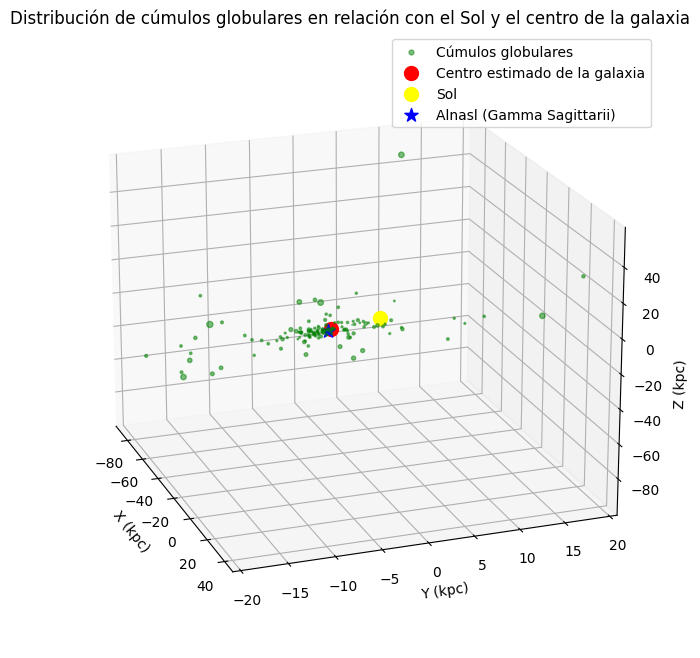

In [81]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los cúmulos
ax.scatter(
    data['x'],
    data['y'],
    data['z'],
    c='green',
    marker='o',
    s=data['radio_parsecs'],
    alpha=0.5,
    label='Cúmulos globulares'
)

# Marcar el punto estimado del centro de la galaxia
ax.scatter(x_avg, y_avg, z_avg, c='red', marker='o', s=100, label='Centro estimado de la galaxia')

# Marcar la posición del Sol
ax.scatter(0, 0, 0, c='yellow', marker='o', s=100, label='Sol')

# Alnasl (Gamma Sagittarii)
ax.scatter(x_star, y_star, z_star, c='blue', marker='*', s=100, label='Alnasl (Gamma Sagittarii)')

# Etiquetas y título
ax.set_xlabel('X (kpc)')
ax.set_ylabel('Y (kpc)')
ax.set_zlabel('Z (kpc)')
ax.set_title('Distribución de cúmulos globulares en relación con el Sol y el centro de la galaxia')
ax.legend()

# Adjust Y axis limits
y_min = -20  # Example value
y_max = 20   # Example value
ax.set_ylim(y_min, y_max)

# Adjust view
ax.view_init(elev=20, azim=-20)

# Mostrar el gráfico
plt.show()


In [ ]:
!pip install plotly

In [89]:
# Normalize radio
valid_radio_parsecs = [size if not np.isnan(size) else 5 for size in data['radio_parsecs']]

In [95]:
import plotly.graph_objects as go

fig = go.Figure()

# Los cúmulos
fig.add_trace(go.Scatter3d(
    x=data['x'], y=data['y'], z=data['z'],
    mode='markers',
    marker=dict(
        size=valid_radio_parsecs,
        color='green',
        opacity=0.5,
    ),
    text=data['ID'],
    hoverinfo="text",
    name='Cúmulos globulares'
))

# Centro estimado de la galaxia
fig.add_trace(go.Scatter3d(
    x=[x_avg], y=[y_avg], z=[z_avg],
    mode='markers',
    marker=dict(size=5, color='red', opacity=1),
    name='Centro estimado de la galaxia'
))

# Sol
fig.add_trace(go.Scatter3d(
    x=[0], y=[0], z=[0],
    mode='markers',
    marker=dict(size=5, color='yellow', opacity=1),
    name='Sol'
))

# Alnasl (Gamma Sagittarii)
fig.add_trace(go.Scatter3d(
    x=[x_star], y=[y_star], z=[y_star],
    mode='markers',
    marker=dict(size=5, color='blue', opacity=1),
    name='Alnasl (Gamma Sagittarii)'
))

fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=0),
    scene=dict(
        xaxis_title='X (kpc)',
        yaxis_title='Y (kpc)',
        zaxis_title='Z (kpc)'
    ),
    title='Distribución de cúmulos globulares en relación con el Sol y el centro de la galaxia'
)

fig.show()


In [94]:
# Plot histogram based on radio

import plotly.express as px

fig = px.histogram(data['radio_parsecs'])

fig.show()

In [93]:
# Plot relation between radio and distance to center of the Galaxy

fig = px.scatter(data,
                 x='distance_to_gal_center',
                 y='radio_parsecs',
                 hover_name='ID',
                 title='Relación entre distancia al centro de la galaxia y radio del cúmulo',
                 labels={
                     'distance_to_gal_center': 'Distancia al centro de la galaxia',
                     'radio_parsecs': 'Radio del cúmulo'
                 }
)

fig.show()